# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal

    You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Bike Rental Assignment

In [1]:
# Import all required libraries for executing code
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn import preprocessing
from scipy.stats import anderson
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [2]:
# Read given data from CSV File
bike_usage = pd.read_csv('day.csv')

In [3]:
# View Data format of read content
bike_usage.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking size of data provided
bike_usage.shape

(730, 16)

### Exploratory Data Analysis

In [5]:
# Checking for null values to be handled
bike_usage.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# There are no null entries in the data set and hence no subsequent action required
# Validate object types for all columns
bike_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


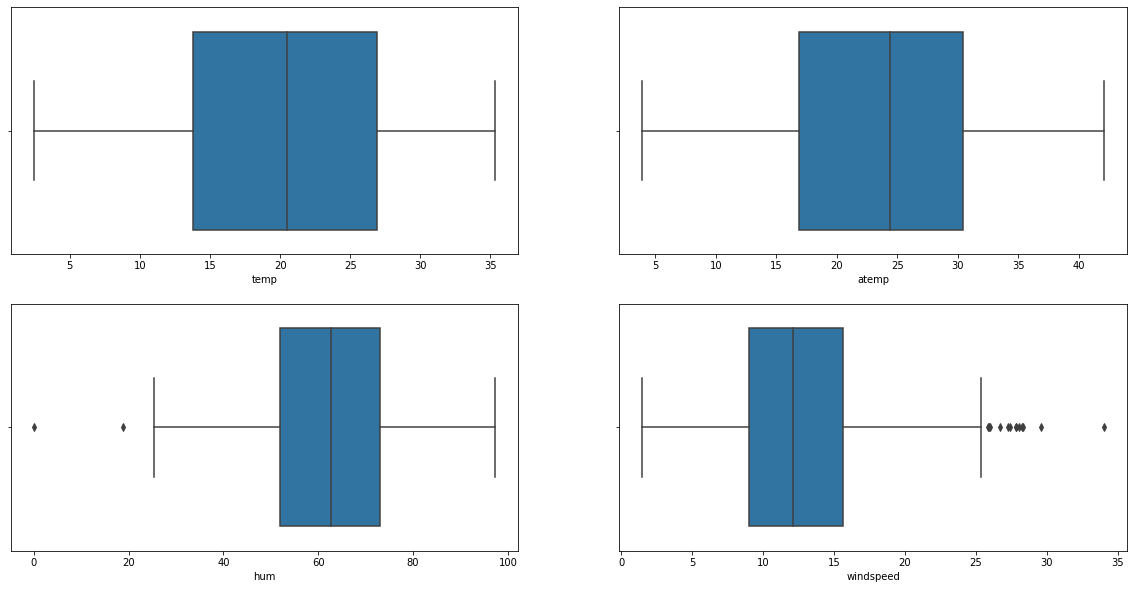

In [7]:
# Checking for outliers in true numerical fields (temp	atemp	hum	windspeed)
# (casual & registered are ignored as they just subset of target variable cnt)
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=bike_usage,x='temp')
plt.subplot(2,2,2)
sns.boxplot(data=bike_usage,x='atemp')
plt.subplot(2,2,3)
sns.boxplot(data=bike_usage,x='hum')
plt.subplot(2,2,4)
sns.boxplot(data=bike_usage,x='windspeed')

In [8]:
# Reviewing the spread of data for numerical columns
bike_usage.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Checking to drop outliers in humidity & windspeed entries considering them as rare unconrollable scenarios
#Calculating upper limit for windspeed
wind_limit = bike_usage.quantile(0.75).windspeed + (1.5 * (bike_usage.quantile(0.75).windspeed - bike_usage.quantile(0.25).windspeed))
#Calculating lower limit for humidity
hum_limit = bike_usage.quantile(0.25).hum - (1.5 * (bike_usage.quantile(0.75).hum - bike_usage.quantile(0.25).hum))
#Checking number of such outlier entries
bike_usage[(bike_usage.hum<hum_limit) | (bike_usage.windspeed>wind_limit)].shape

(14, 16)

In [10]:
# Dropping the outlier entries as the count is less than 10% of the total data
bike_usage = bike_usage[~((bike_usage.hum<hum_limit) | (bike_usage.windspeed>wind_limit))]
bike_usage.shape

(716, 16)

#### Understanding:
Checkign the calendar, we know that Monday (01-01-2018) is represented by numerical 6 in weekday column.
All columns are either integers or decimal values except dteday which is a date

#### Columns to be dropped:
As cnt is our target variable which is total count of rented bikes, we can analyze the dependency of year, month or weekday which are already seperate columns and hence we can drop the dteday column 
Instant column is just like index and hence dropping this colum as well.
We can also drop the column working day because holidays are already represnted in holiday column and Sundays are represented in the weekday column. However, in order to see the possibility of greater dependeny on any kind of holiday, we will leave it for now and remove it from model if it does not play any role.

#### Derived Columns:
The columns casual & registered are just the count columns split between total users or cnt column. Therefore, they cannot be used as predictors. Therfore, we will derive another column which indicates ratio of registered users to casual users. This can later be used as a predictor, which will indicate the company to get as many people registered as possible.

In [11]:
bike_usage.drop('dteday',axis=1,inplace=True)
bike_usage.drop('instant',axis=1,inplace=True)

In [12]:
# Replacing numerical values in categorical variable columns
bike_usage.season = bike_usage.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike_usage.mnth = bike_usage.mnth.map({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",\
                       7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
bike_usage.holiday = bike_usage.holiday.map({1:"Festival",0:"Work"})
bike_usage.weekday = bike_usage.weekday.map({6:"Monday",0:"Tuesday",1:"Wednesday",2:"Thursday",3:"Friday",4:"Saturday",5:"Sunday"})
bike_usage.workingday = bike_usage.workingday.map({1:"Break",0:"Work"})
bike_usage.weathersit = bike_usage.weathersit.map({1:"Clear",2:"Mist",3:"Snow",4:"HeavyRain"})

In [13]:
# Renaming yr column as awareness to understand that in 2019 the usage would increase given better awareness
bike_usage.rename(columns = {'yr':'Awareness'},inplace = True)

# Creating a derived column for type of users in terms of ratio
bike_usage['ratio_register'] = round(bike_usage['registered'] / bike_usage['casual'],2)

# Dropping the registered & casual columns
bike_usage.drop(['registered','casual'],axis=1,inplace=True)

In [14]:
# Viewing updated data content
bike_usage.head()

,season,Awareness,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,ratio_register
0,spring,0,January,Work,Monday,Work,Mist,14.110847,18.18125,80.5833,10.749882,985,1.98
1,spring,0,January,Work,Tuesday,Work,Mist,14.902598,17.68695,69.6087,16.652113,801,5.11
2,spring,0,January,Work,Wednesday,Break,Clear,8.050924,9.47025,43.7273,16.636703,1349,10.24
3,spring,0,January,Work,Thursday,Break,Clear,8.200000,10.60610,59.0435,10.739832,1562,13.46
4,spring,0,January,Work,Friday,Break,Clear,9.305237,11.46350,43.6957,12.522300,1600,18.51


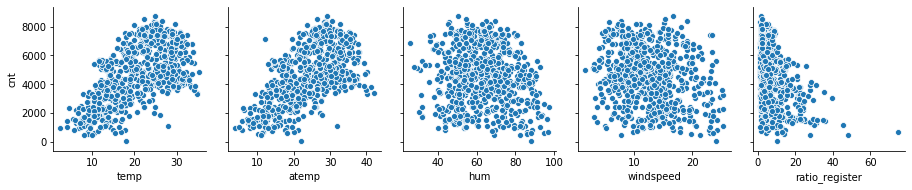

In [15]:
# Visuavilizing true numeric variables against target variable
sns.pairplot(bike_usage,y_vars=['cnt'],x_vars=['temp','atemp','hum','windspeed','ratio_register'])

In [16]:
# Clearly temperature seems to have a better linear relation with cnt when compared to other parameters.

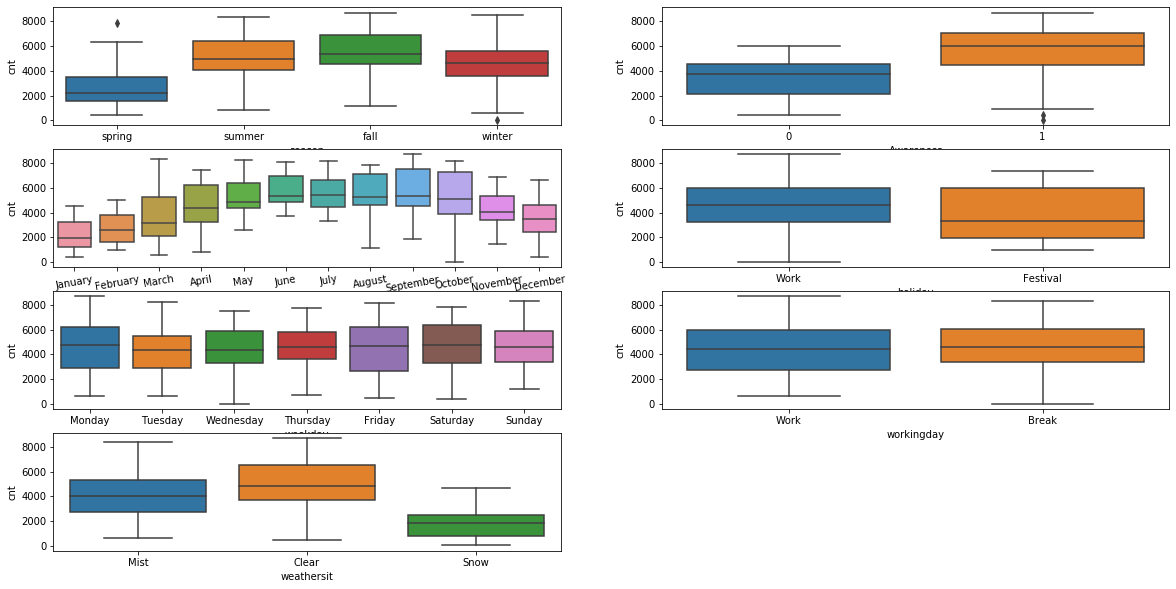

In [17]:
# Visuavilizing categorical variables against target variable
plt.figure(figsize=(20,10))
plt.subplot(4,2,1)
sns.boxplot(data=bike_usage,x='season',y='cnt')
plt.subplot(4,2,2)
sns.boxplot(data=bike_usage,x='Awareness',y='cnt')
plt.subplot(4,2,3)
plt.xticks(rotation=10)
sns.boxplot(data=bike_usage,x='mnth',y='cnt')
plt.subplot(4,2,4)
sns.boxplot(data=bike_usage,x='holiday',y='cnt')
plt.subplot(4,2,5)
sns.boxplot(data=bike_usage,x='weekday',y='cnt')
plt.subplot(4,2,6)
sns.boxplot(data=bike_usage,x='workingday',y='cnt')
plt.subplot(4,2,7)
sns.boxplot(data=bike_usage,x='weathersit',y='cnt')
plt.show()

#### Understandings from above boxplots:
1) As we already know, awareness has caused increase in usage.

2) Spring, winter, summer & fall seem to  have an increasing usage in the same sequence.

3) May till Oct seem to have higher usage, which is inline with the behavior observed against seasons. So, we already have an intuation that both might be correlated.

4) Usage seem to be directly linked to weather clarity.

5) All other parameters do not seem to show effect and hence we can follow the same sequence while bulding a model in terms of selecting the probable predictors first

### Multi Linear Regression Model Setup

In [18]:
# Creating dummy variables as a preparation for Model setup
# Though we could live with using only n-1 variations against each feature, we will stick to not dropping the first value in order to analyze the possible dependency
bike_dummy = pd.get_dummies(data = bike_usage, columns = ['season','mnth','holiday','weekday','workingday','weathersit'])

In [19]:
# Checking to see the total set of columns after the dummy variable addition
bike_dummy.columns

Index(['Awareness', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'ratio_register', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'mnth_April', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_November', 'mnth_October', 'mnth_September',
       'holiday_Festival', 'holiday_Work', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Break',
       'workingday_Work', 'weathersit_Clear', 'weathersit_Mist',
       'weathersit_Snow'],
      dtype='object')

In [20]:
# Creating a duplicate dataframe not to disturb the original for future use
bike_m1 = bike_dummy

In [21]:
# Spliting Data for training & testing
np.random.seed(0)
m1_train,m1_test = train_test_split(bike_m1,train_size=0.7,test_size=0.3,random_state=100)

In [22]:
# Setting up a scalar variable for use
scaler = MinMaxScaler()
# All true numerical columns would be scaled to secure best inference capability
# Categorical columns represented by binary notation are not touched.
num_cols = ['temp','atemp','hum','windspeed','cnt','ratio_register']
m1_train[num_cols] = scaler.fit_transform(m1_train[num_cols])
m1_train.head()

,Awareness,temp,atemp,hum,windspeed,cnt,ratio_register,season_fall,season_spring,season_summer,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Break,workingday_Work,weathersit_Clear,weathersit_Mist,weathersit_Snow
728,1,0.252441,0.204242,0.293114,0.923102,0.204096,0.040173,0,1,0,...,0,0,0,1,0,0,1,1,0,0
541,1,0.733702,0.689995,0.126342,0.914353,0.853659,0.066955,1,0,0,...,0,0,1,0,0,1,0,1,0,0
116,0,0.719799,0.663818,0.826912,0.814718,0.442936,0.069255,0,0,1,...,0,0,0,0,0,1,0,0,1,0
718,1,0.347624,0.342763,0.572964,0.309436,0.472388,0.151359,0,0,0,...,1,0,0,0,0,1,0,0,1,0
496,1,0.648145,0.623239,0.288693,0.283207,0.852163,0.011768,0,0,1,...,0,0,0,0,0,0,1,1,0,0


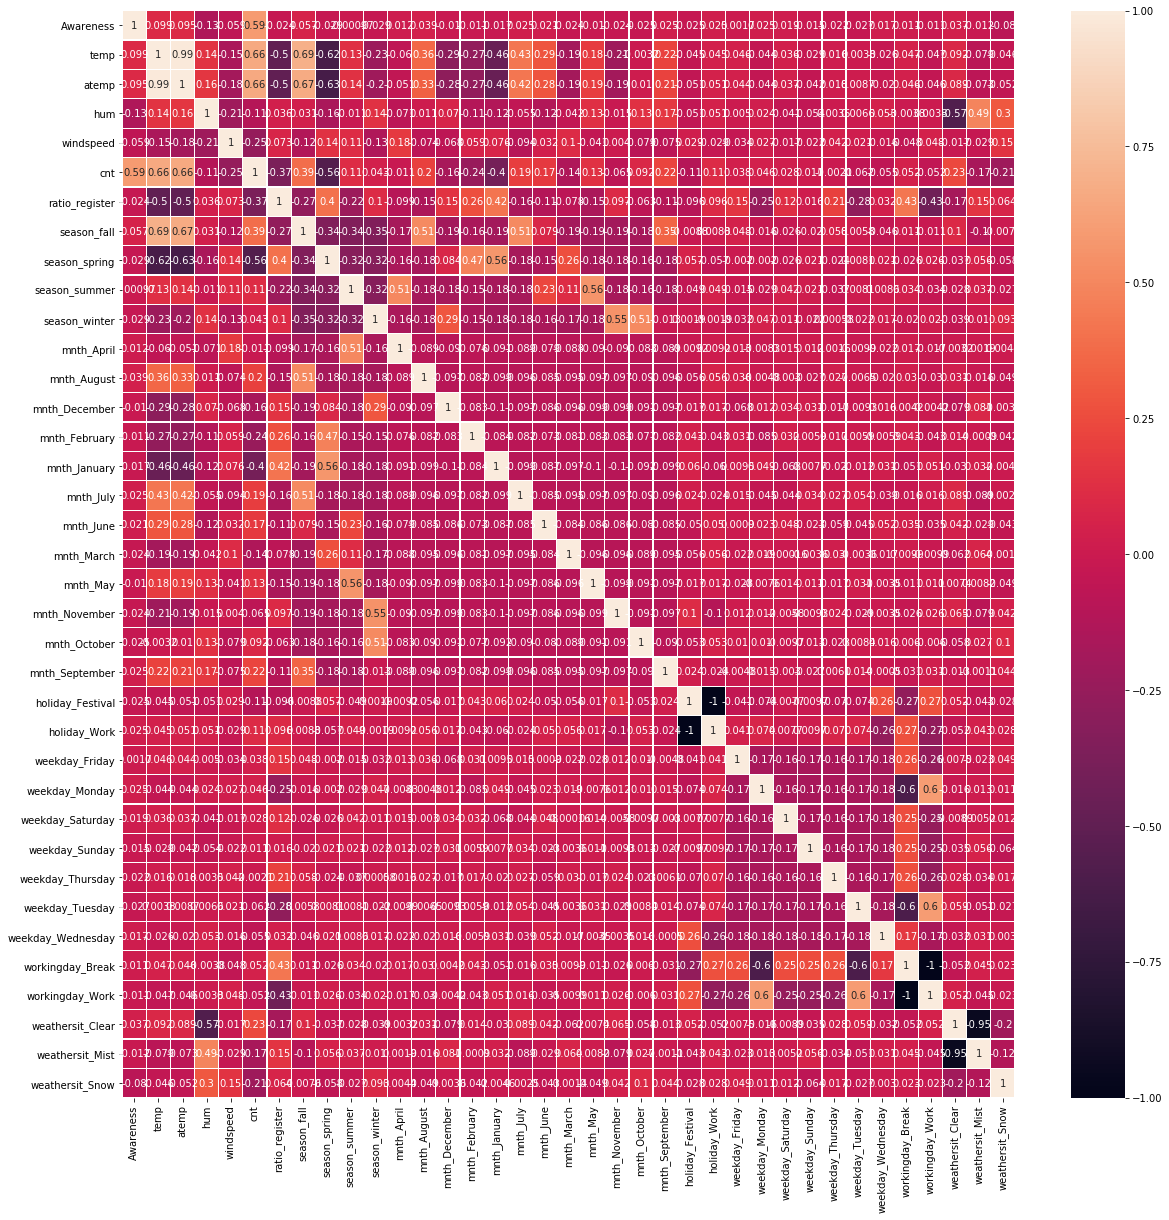

In [23]:
# CHecking most closely related variable before tryong to build a model
plt.figure(figsize=(20,20))
sns.heatmap(m1_train.corr(),annot=True,linewidths=0.2)
plt.show()

#### Correlation Analysis:
1) Awareness, temp, atemp & season_spring seem to be the most correlated to target variable cnt and hence woudl expect them in model.

##### Features that seem to be highly correlated and not expected together in model:
1) temp against atemp

2) temp against ratio_register, season_fall & season_spring

3) hum against weathersit_Mist & weathersit_Clear

4) ratio_register against mnth_January, workingday_Work & workingday_Break

5) season_fall against mnth_July & mnth_August

6) season_spring against mnth_January & mnth_February

7) season_summer against mnth_April & mnth_May

8) season_winter against mnth_October & mnth_November

9) working_Break & working_Work against weekday_Monday & weekday_Tuesday

10) weathersit_Mist against weathersit_Clear

In [24]:
# Dividing into predictor & resultant columns for modeling
copy_m1_train = m1_train.copy()
y_train = copy_m1_train.pop('cnt')
x_train = copy_m1_train

In [25]:
# Building Linear regression Model using RFE method considering all variables
#(We have used all predictors instead of a smaller number as a seperate trail lead to inconsistant or incorrect model being built)
rfe_mod = LinearRegression()
rfe_mod.fit(x_train,y_train)
rfe_result = RFE(rfe_mod,36)
rfe_result = rfe_result.fit(x_train,y_train)

In [26]:
# Showcasing all the predictors
top36 = x_train.columns[rfe_result.support_]
top36

Index(['Awareness', 'temp', 'atemp', 'hum', 'windspeed', 'ratio_register',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_April', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September', 'holiday_Festival',
       'holiday_Work', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday_Break', 'workingday_Work',
       'weathersit_Clear', 'weathersit_Mist', 'weathersit_Snow'],
      dtype='object')

In [27]:
# Creating a new dataframe with selected columns only
x_train_rfe = x_train[top36]

In [28]:
#Building Linear Model with all pre-selected variables
x_train_rfe = sm.add_constant(x_train_rfe)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()

In [29]:
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.37e-181
Time:                        19:19:26   Log-Likelihood:                 528.46
No. Observations:                 501   AIC:                            -996.9
Df Residuals:                     471   BIC:                            -870.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.064e+10   4.96e+1

In [30]:
# From the above model,ratio_register is the most insignificant and hence we would drop it and check the model again.
# We will continue dropping variables with higher p-values while validating the R square value is not drastically dropping.
# This process will continue until we reach a set of predictors which are all significant.
x_train_rfe.drop('ratio_register',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     103.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.10e-182
Time:                        19:19:26   Log-Likelihood:                 526.53
No. Observations:                 501   AIC:                            -995.1
Df Residuals:                     472   BIC:                            -872.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.725e+10   4.67e+1

In [31]:
# From the above model,atemp is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('atemp',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.11e-182
Time:                        19:19:27   Log-Likelihood:                 526.14
No. Observations:                 501   AIC:                            -996.3
Df Residuals:                     473   BIC:                            -878.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.432e+10   5.61e+1

In [32]:
# From the above model,workingday_Break is the feature with highest insignificance and lowest coefficient and hence will be dropped.
x_train_rfe.drop('workingday_Break',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     108.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.70e-184
Time:                        19:19:27   Log-Likelihood:                 528.74
No. Observations:                 501   AIC:                            -1001.
Df Residuals:                     473   BIC:                            -883.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.474e+11   2.96e+1

In [33]:
# From the above model,holiday_Festival is the feature with highest insignificance and lowest coefficient and hence will be dropped.
x_train_rfe.drop('holiday_Festival',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     108.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.61e-184
Time:                        19:19:27   Log-Likelihood:                 528.87
No. Observations:                 501   AIC:                            -1002.
Df Residuals:                     473   BIC:                            -883.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0805      0.01

In [34]:
# From the above model,weekday_Wednesday is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('weekday_Wednesday',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     108.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.61e-184
Time:                        19:19:27   Log-Likelihood:                 528.87
No. Observations:                 501   AIC:                            -1002.
Df Residuals:                     473   BIC:                            -883.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0795      0.019  

In [35]:
# From the above model,mnth_October is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('mnth_October',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     108.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.61e-184
Time:                        19:19:27   Log-Likelihood:                 528.87
No. Observations:                 501   AIC:                            -1002.
Df Residuals:                     473   BIC:                            -883.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0833      0.023  

In [36]:
# From the above model,mnth_June is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('mnth_June',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     113.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.38e-185
Time:                        19:19:27   Log-Likelihood:                 528.82
No. Observations:                 501   AIC:                            -1004.
Df Residuals:                     474   BIC:                            -889.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0851      0.022  

In [37]:
# From the above model,mnth_August is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('mnth_August',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.70e-186
Time:                        19:19:27   Log-Likelihood:                 528.81
No. Observations:                 501   AIC:                            -1006.
Df Residuals:                     475   BIC:                            -896.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0853      0.022  

In [38]:
# From the above model,mnth_April is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('mnth_April',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     123.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.52e-187
Time:                        19:19:27   Log-Likelihood:                 528.72
No. Observations:                 501   AIC:                            -1007.
Df Residuals:                     476   BIC:                            -902.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0881      0.021  

In [39]:
# From the above model,weekday_Saturday is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('weekday_Saturday',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.32e-188
Time:                        19:19:27   Log-Likelihood:                 528.60
No. Observations:                 501   AIC:                            -1009.
Df Residuals:                     477   BIC:                            -908.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0901      0.021  

In [40]:
# From the above model,season_fall is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('season_fall',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.32e-188
Time:                        19:19:27   Log-Likelihood:                 528.60
No. Observations:                 501   AIC:                            -1009.
Df Residuals:                     477   BIC:                            -908.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0978      0.027  

In [41]:
# From the above model,season_summer is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('season_summer',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.37e-189
Time:                        19:19:27   Log-Likelihood:                 528.29
No. Observations:                 501   AIC:                            -1011.
Df Residuals:                     478   BIC:                            -913.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1075      0.024  

In [42]:
# From the above model,weekday_Thursday is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('weekday_Thursday',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     140.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.87e-190
Time:                        19:19:27   Log-Likelihood:                 527.92
No. Observations:                 501   AIC:                            -1012.
Df Residuals:                     479   BIC:                            -919.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1087      0.024  

In [43]:
# From the above model,mnth_February is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('mnth_February',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.13e-190
Time:                        19:19:27   Log-Likelihood:                 527.56
No. Observations:                 501   AIC:                            -1013.
Df Residuals:                     480   BIC:                            -924.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1026      0.023  

In [44]:
# From the above model,workingday_Work is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('workingday_Work',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.13e-190
Time:                        19:19:27   Log-Likelihood:                 527.56
No. Observations:                 501   AIC:                            -1013.
Df Residuals:                     480   BIC:                            -924.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1105      0.029  

In [45]:
# From the above model,weekday_Friday is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('weekday_Friday',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     155.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.78e-191
Time:                        19:19:27   Log-Likelihood:                 526.04
No. Observations:                 501   AIC:                            -1012.
Df Residuals:                     481   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1125      0.029  

In [46]:
# From the above model,weekday_Sunday is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('weekday_Sunday',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     162.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.51e-191
Time:                        19:19:27   Log-Likelihood:                 524.32
No. Observations:                 501   AIC:                            -1011.
Df Residuals:                     482   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1165      0.029  

In [47]:
# From the above model,mnth_July is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('mnth_July',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     171.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.44e-192
Time:                        19:19:27   Log-Likelihood:                 522.51
No. Observations:                 501   AIC:                            -1009.
Df Residuals:                     483   BIC:                            -933.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1172      0.029  

In [48]:
# From the above model,mnth_March is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('mnth_March',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     180.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.09e-192
Time:                        19:19:27   Log-Likelihood:                 520.55
No. Observations:                 501   AIC:                            -1007.
Df Residuals:                     484   BIC:                            -935.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1243      0.029  

In [49]:
# From the above model,weekday_Monday is the most insignificant and hence we would drop it and check the model again.
x_train_rfe.drop('weekday_Monday',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     190.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.97e-192
Time:                        19:19:27   Log-Likelihood:                 517.54
No. Observations:                 501   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -935.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1224      0.029  

In [50]:
# From the above model,mnth_May is the most insignificant and hence we would drop it and check the model again.
#(done only because we still have 15 features)
x_train_rfe.drop('mnth_May',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.50e-191
Time:                        19:19:27   Log-Likelihood:                 513.39
No. Observations:                 501   AIC:                            -996.8
Df Residuals:                     486   BIC:                            -933.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1250      0.029  

In [51]:
# Now since all columns seem to be significant, we will cross check with VIF
x_train_vif = x_train_rfe.drop('const',axis=1)

In [52]:
vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values,i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,weathersit_Clear,48.69
13,weathersit_Mist,33.15
14,weathersit_Snow,3.72
1,temp,3.05
4,season_spring,2.85
5,season_winter,2.32
2,hum,2.00
8,mnth_November,1.79
7,mnth_January,1.64
6,mnth_December,1.46


In [53]:
# From the above model,weathersit_Clear is the feature with highest VIF value
# We also saw that it is correlated to hum and hence droppign it to rebuild the model.
x_train_rfe.drop('weathersit_Clear',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.50e-191
Time:                        19:19:27   Log-Likelihood:                 513.39
No. Observations:                 501   AIC:                            -996.8
Df Residuals:                     486   BIC:                            -933.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2561      0.035     

In [54]:
# Now since all columns seem to be significant, we will cross check with VIF
x_train_vif = x_train_rfe.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values,i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,holiday_Work,18.96
1,temp,13.63
2,hum,13.13
3,windspeed,5.76
4,season_spring,3.06
5,season_winter,2.89
12,weathersit_Mist,2.54
0,Awareness,2.11
8,mnth_November,1.88
7,mnth_January,1.74


In [55]:
# Though holiday_Work has a high VIF, we did not see any correlation earlier.
# Therefore, we will drop mnth_January which currently feature with highest insignificance.
x_train_rfe.drop('mnth_January',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     210.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.92e-190
Time:                        19:19:27   Log-Likelihood:                 507.53
No. Observations:                 501   AIC:                            -987.1
Df Residuals:                     487   BIC:                            -928.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2327      0.035     

In [56]:
# From the above model, we will drop mnth_December which currently feature with highest insignificance.
x_train_rfe.drop('mnth_December',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     224.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.40e-190
Time:                        19:19:28   Log-Likelihood:                 503.62
No. Observations:                 501   AIC:                            -981.2
Df Residuals:                     488   BIC:                            -926.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2203      0.035     

In [57]:
# Now since all columns seem to be significant, we will cross check with VIF
x_train_vif = x_train_rfe.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values,i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,holiday_Work,18.60
2,hum,12.91
1,temp,12.77
3,windspeed,5.75
4,season_spring,2.59
10,weathersit_Mist,2.54
5,season_winter,2.49
0,Awareness,2.10
6,mnth_November,1.64
11,weathersit_Snow,1.36


In [58]:
# From the above model,holiday_Work still has a high VIF and hence will drop it to see model behavior
x_train_rfe.drop('holiday_Work',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     236.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.13e-187
Time:                        19:19:28   Log-Likelihood:                 495.73
No. Observations:                 501   AIC:                            -967.5
Df Residuals:                     489   BIC:                            -916.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3099      0.027     

In [59]:
# Now since all columns seem to be significant, we will cross check with VIF
x_train_vif = x_train_rfe.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values,i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,11.90
1,temp,9.35
3,windspeed,4.92
9,weathersit_Mist,2.53
5,season_winter,2.24
4,season_spring,2.13
0,Awareness,2.05
6,mnth_November,1.64
10,weathersit_Snow,1.36
7,mnth_September,1.19


In [60]:
# From the above model,hum still has a high VIF and hence will drop it to see model behavior
x_train_rfe.drop('hum',axis=1,inplace=True)
lr_mod1 = sm.OLS(y_train,x_train_rfe).fit()
print(lr_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     249.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.92e-185
Time:                        19:19:28   Log-Likelihood:                 487.15
No. Observations:                 501   AIC:                            -952.3
Df Residuals:                     490   BIC:                            -905.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2657      0.025     

In [61]:
# Now since all columns seem to be significant, we will cross check with VIF
x_train_vif = x_train_rfe.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values,i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.90
1,temp,4.52
0,Awareness,2.03
4,season_winter,1.93
3,season_spring,1.73
5,mnth_November,1.64
8,weathersit_Mist,1.58
6,mnth_September,1.17
7,weekday_Tuesday,1.17
9,weathersit_Snow,1.09


In [62]:
# Since all the VIF values are now only less than 5, we need not drop any further variables unless the model does not predict well.
# So we will now check for fitness of model

In [63]:
# Residual analysis
y_train_pred = lr_mod1.predict(x_train_rfe)

Text(0.5, 0, 'Errors')

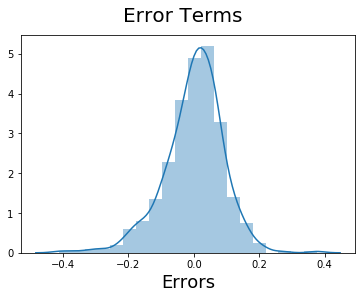

In [64]:
# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [65]:
# Error Terms are normally distributed with mean value around zero.

#### Making Predictions Using the Final Model
The error terms are normally distributed and hence we will try to predict the values against test set.

In [66]:
#Applying Scaling to Test set data
m1_test[num_cols] = scaler.transform(m1_test[num_cols])
m1_test.head()

,Awareness,temp,atemp,hum,windspeed,cnt,ratio_register,season_fall,season_spring,season_summer,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Break,workingday_Work,weathersit_Clear,weathersit_Mist,weathersit_Snow
583,1,0.868455,0.827713,0.627290,0.265707,0.834215,0.050453,1,0,0,...,0,0,1,0,0,1,0,0,1,0
493,1,0.662048,0.634223,0.688567,0.545436,0.540152,0.076424,0,0,1,...,0,0,0,0,0,1,0,0,1,0
294,0,0.466335,0.463565,0.514214,0.197559,0.493097,0.012309,0,0,0,...,0,0,0,0,0,0,1,1,0,0
157,0,0.832094,0.771951,0.466836,0.465023,0.553497,0.059110,0,0,1,...,0,0,1,0,0,1,0,1,0,0
670,1,0.379708,0.370630,0.351863,0.685331,0.670156,0.101447,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [67]:
# Creating a duplicate for test set
copy_m1_test = m1_test.copy()
# Applying the Model m1 to predict the y values and check the R square against test set data
y_test = copy_m1_test.pop('cnt')
x_test = copy_m1_test
#Adding constant to apply model
x_test_rfe = sm.add_constant(x_test)
# Removing all dropped columns from test set data
x_test_rfe.drop(['atemp', 'hum', 'ratio_register', 'season_fall', 'season_summer', 'mnth_April', 'mnth_August', 'mnth_December','mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March','mnth_May', 'mnth_October', 'holiday_Festival', 'holiday_Work', 'weekday_Friday', 'weekday_Monday','weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Wednesday', 'workingday_Break','workingday_Work', 'weathersit_Clear'],axis=1,inplace=True)
# Predicting y values using developed model 1
y_pred_m1 = lr_mod1.predict(x_test_rfe)
# Calculating R square value for test set data
r2_score(y_true=y_test,y_pred=y_pred_m1)

0.7847737108306925

In [68]:
# The Rsquare of model was 0.836 while with the test set we arrived at 0.784. There is a difference of about 5% indicating a probable overfitting situation
# We will have to remove some more features and hence will start with highest VIF as the significance of all selected features is same at the moment.

In [69]:
# From the above model,windspeed is the feature with highest VIF and hence dropping it.
# We are creatign a duplicate model as we might have to go back in case the drop did not give desired results
x_train_rfe2 = x_train_rfe.drop('windspeed',axis=1)
lr_mod2 = sm.OLS(y_train,x_train_rfe2).fit()
print(lr_mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.84e-183
Time:                        19:19:28   Log-Likelihood:                 478.82
No. Observations:                 501   AIC:                            -937.6
Df Residuals:                     491   BIC:                            -895.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2149      0.022     

In [70]:
# Now since all columns seem to be significant, we will cross check with VIF
x_train_vif = x_train_rfe2.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values,i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,2.53
0,Awareness,2.03
3,season_winter,1.90
4,mnth_November,1.61
7,weathersit_Mist,1.56
2,season_spring,1.26
5,mnth_September,1.17
6,weekday_Tuesday,1.16
8,weathersit_Snow,1.05


In [71]:
# Since all the VIF values are now only less than 5, we need not drop any further variables unless the model does not predict well.
# So we will now check for fitness of model

In [72]:
# Residual analysis
y_train_pred = lr_mod2.predict(x_train_rfe2)

Text(0.5, 0, 'Errors')

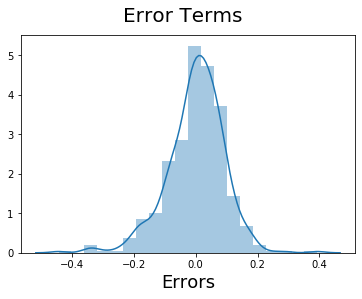

In [73]:
# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [74]:
# Error Terms are normally distributed with mean value around zero.

#### Making Predictions Using the Final Model 2
The error terms are normally distributed and hence we will try to predict the values against test set.

In [75]:
# Creating a duplicate for test set
copy_m1_test = m1_test.copy()
# Applying the Model m1 to predict the y values and check the R square against test set data
y_test = copy_m1_test.pop('cnt')
x_test = copy_m1_test
#Adding constant to apply model
x_test_rfe = sm.add_constant(x_test)
# Removing all dropped columns from test set data
x_test_rfe.drop(['windspeed','atemp', 'hum', 'ratio_register', 'season_fall', 'season_summer', 'mnth_April', 'mnth_August', 'mnth_December','mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March','mnth_May', 'mnth_October', 'holiday_Festival', 'holiday_Work', 'weekday_Friday', 'weekday_Monday','weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Wednesday', 'workingday_Break','workingday_Work', 'weathersit_Clear'],axis=1,inplace=True)
# Predicting y values using developed model 1
y_pred_m2 = lr_mod2.predict(x_test_rfe)
# Calculating R square value for test set data
r2_score(y_true=y_test,y_pred=y_pred_m2)

0.7840715366853017

#### Next Steps:
Removing the windspeed did not help the model in any way as both R square against train & test set dropped.
We can now proceed one of the below approaches as the VIF values seem ok.
    
    Option 1: Based on the initial collinear analysis, we can try dropping one of the correlated fields
        season_winter vs mnth_November OR temp vs season_spring
        
    Option 2: We can try dropping variable with negligible coefficinet and observe the impact on Rsquare

In [76]:
# From model1,mnth_November is the feature with higher p-value and smaller coefficient, hence dropping it.
# We are creating a duplicate model as we might have to go back in case the drop did not give desired results
x_train_rfe3 = x_train_rfe.drop('mnth_November',axis=1)
lr_mod3 = sm.OLS(y_train,x_train_rfe3).fit()
print(lr_mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     270.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.00e-184
Time:                        19:19:28   Log-Likelihood:                 481.56
No. Observations:                 501   AIC:                            -943.1
Df Residuals:                     491   BIC:                            -901.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2565      0.025     

In [77]:
# From the above model, we will drop weekday_Tuesday which currently feature with highest insignificance.
x_train_rfe3.drop('weekday_Tuesday',axis=1,inplace=True)
lr_mod3 = sm.OLS(y_train,x_train_rfe3).fit()
print(lr_mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     298.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.68e-183
Time:                        19:19:28   Log-Likelihood:                 476.67
No. Observations:                 501   AIC:                            -935.3
Df Residuals:                     492   BIC:                            -897.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2507      0.025     

In [78]:
# Now since all columns seem to be significant, we will cross check with VIF
x_train_vif = x_train_rfe3.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values,i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.78
1,temp,4.42
0,Awareness,2.03
3,season_spring,1.71
6,weathersit_Mist,1.56
4,season_winter,1.34
5,mnth_September,1.16
7,weathersit_Snow,1.09


Text(0.5, 0, 'Errors')

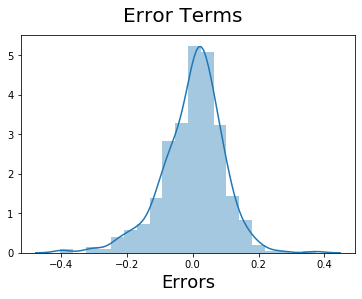

In [79]:
# Since all the VIF values are way below 5, we need not drop any further variables
# Residual analysis
y_train_pred = lr_mod3.predict(x_train_rfe3)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [80]:
# Error Terms are normally distributed with mean value around zero.

In [81]:
# Creating a duplicate for test set
copy_m1_test = m1_test.copy()
# Applying the Model m1 to predict the y values and check the R square against test set data
y_test = copy_m1_test.pop('cnt')
x_test = copy_m1_test
#Adding constant to apply model
x_test_rfe = sm.add_constant(x_test)
# Removing all dropped columns from test set data
x_test_rfe.drop(['atemp', 'hum', 'ratio_register', 'season_fall', 'season_summer', 'mnth_April', 'mnth_August', 'mnth_December','mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March','mnth_May', 'mnth_November', 'mnth_October', 'holiday_Festival', 'holiday_Work', 'weekday_Friday', 'weekday_Monday','weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday','weekday_Tuesday', 'weekday_Wednesday', 'workingday_Break','workingday_Work', 'weathersit_Clear'],axis=1,inplace=True)
# Predicting y values using developed model 1
y_pred_m3 = lr_mod3.predict(x_test_rfe)
# Calculating R square value for test set data
r2_score(y_true=y_test,y_pred=y_pred_m3)

0.7787811021783209

In [82]:
# Model3 also seems to be similar ro Model2 and hence we will now try to drop season_spring from Model 1

In [83]:
# We are creating a duplicate model as we might have to go back in case the drop did not give desired results
x_train_rfe4 = x_train_rfe.drop('season_spring',axis=1)
lr_mod4 = sm.OLS(y_train,x_train_rfe4).fit()
print(lr_mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     240.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.30e-173
Time:                        19:19:29   Log-Likelihood:                 456.79
No. Observations:                 501   AIC:                            -893.6
Df Residuals:                     491   BIC:                            -851.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1253      0.019     

In [84]:
# Now since all columns seem to be significant, we will cross check with VIF
x_train_vif = x_train_rfe4.drop('const',axis=1)

vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values,i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,3.88
2,windspeed,3.58
0,Awareness,1.96
3,season_winter,1.86
4,mnth_November,1.63
7,weathersit_Mist,1.53
5,mnth_September,1.16
6,weekday_Tuesday,1.16
8,weathersit_Snow,1.09


Text(0.5, 0, 'Errors')

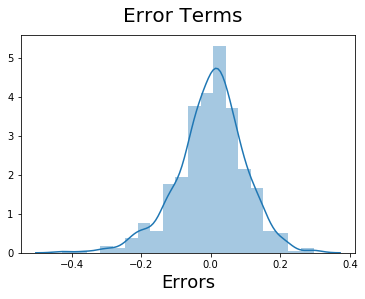

In [85]:
# Since all the VIF values are way below 5, we need not drop any further variables
# Residual analysis
y_train_pred = lr_mod4.predict(x_train_rfe4)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [86]:
# Error Terms are normally distributed with mean value around zero.

In [87]:
# Creating a duplicate for test set
copy_m1_test = m1_test.copy()
# Applying the Model m1 to predict the y values and check the R square against test set data
y_test = copy_m1_test.pop('cnt')
x_test = copy_m1_test
#Adding constant to apply model
x_test_rfe = sm.add_constant(x_test)
# Removing all dropped columns from test set data
x_test_rfe.drop(['season_spring','atemp', 'hum', 'ratio_register', 'season_fall', 'season_summer', 'mnth_April', 'mnth_August', 'mnth_December','mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March','mnth_May', 'mnth_October', 'holiday_Festival', 'holiday_Work', 'weekday_Friday', 'weekday_Monday','weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Wednesday', 'workingday_Break','workingday_Work', 'weathersit_Clear'],axis=1,inplace=True)
# Predicting y values using developed model 1
y_pred_m4 = lr_mod4.predict(x_test_rfe)
# Calculating R square value for test set data
r2_score(y_true=y_test,y_pred=y_pred_m4)

0.742564760863158

In [88]:
# Though we have crated 3 new models lr_mod2, lr_mod3 & lr_mod4, they still dont seem to help.
# The new models dont reduce the gap between train data R square and test data R square and hence we stick to lr_mod1 only

Text(0, 0.5, 'Model Predictions')

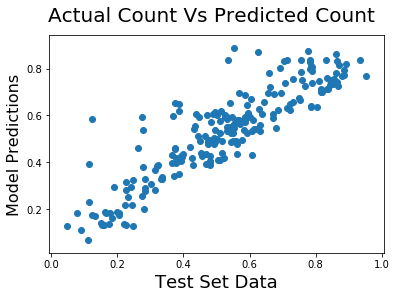

In [89]:
# Visualiztion to see how will the predicted values are in comparison to the original values
fig = plt.figure()
plt.scatter(y_test, y_pred_m1)
fig.suptitle('Actual Count Vs Predicted Count', fontsize = 20) 
plt.xlabel('Test Set Data', fontsize = 18)
plt.ylabel('Model Predictions', fontsize = 16)   

In [90]:
# The above graph clearly show cases that the predictions are very close or following a pattern in terms of arriving at the actual values.

Text(0.5, 0.98, 'Actual and Predicted Count Values')

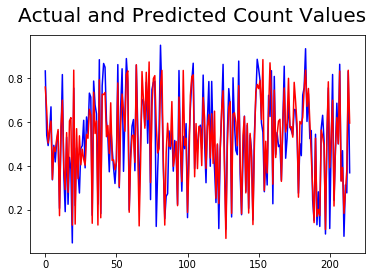

In [91]:
#Actual vs Predicted in line graph
c = [i for i in range(y_pred_m1.shape[0])]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_pred_m1, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted Count Values', fontsize=20)

In [92]:
# In the above graph, we see the actual data coincides with the predicted data in most cases except for a few spikes not being covered.
# This small amount of deviation can be attributed to the R square value of 0.83 only. 

Text(0, 0.5, 'Variance')

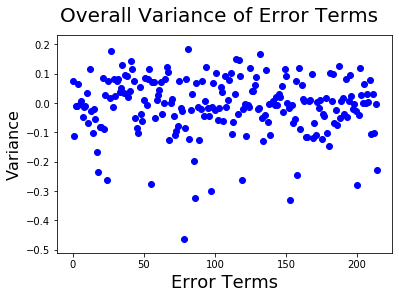

In [93]:
# Error Variance Analysis
c = [i for i in range(y_pred_m1.shape[0])]
fig = plt.figure()
plt.scatter(c,(y_test - y_pred_m1), color="blue")
fig.suptitle('Overall Variance of Error Terms', fontsize=20)
plt.xlabel('Error Terms', fontsize=18)
plt.ylabel('Variance', fontsize=16)

In [94]:
# We see that the variance is consistent between -0.2 & 0.2 with as low as 1% outliers

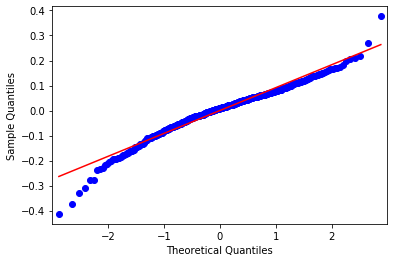

In [95]:
# qqplot analysis for residuals
res = lr_mod1.resid
fig = sm.qqplot(res,line='s')
plt.show()

### Conclusion:
We have arrived at a very apt model with around 83% accuracy

#### Final prediction model equation would be:
cnt = (0.4059 * temp) - (0.2735 * weathersit_Snow) + (0.2361 * Awareness) - (0.1244 * season_spring) - (0.0850 * windspeed) - (0.0712 * weathersit_Mist) +  (0.0667 * season_winter) + (0.0609 * mnth_September) - (0.0591 * mnth_November) - (0.0383 * weekday_Tuesday) + 0.2657